In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import math

import pre_processing_nick as pp
import nick_mod as mod
from nick_mod import *

In [2]:
df = pp.create_modeling_df()

Using cached CSV
the shape of this modeling df should be (6893, 46)
the current shape is (6893, 46)
please split and then scale this dataframe


In [3]:
X_train, X_validate, X_test,\
y_train, y_validate, y_test = pp.split_and_scale(df)

In [4]:
print('X_train:', X_train.shape)
print('X_validate:', X_validate.shape)
print('X_test:', X_test.shape)

X_train: (3859, 46)
X_validate: (1655, 46)
X_test: (1379, 46)


## Feature Selection
Trying a new approach to feature selection using one of Scikitlearn's transformers. 
This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score of an estimator. The following features were selected through this process, in three separate iterations. 
***

In [4]:
precision_features = ['production_company_Metro-Goldwyn-Mayer(MGM)','production_company_other_company',
                      'cast_actor_1_Tom Cruise', 'cast_actor_1_Robert De Niro','vote_count',
                      'is_genre_scifi','production_company_NewLineCinema', 'budget',
                      'is_genre_thriller', 'cast_actor_1_Nicolas Cage']

X_train = X_train.loc[:, precision_features]
X_validate = X_validate.loc[:, precision_features]
X_test = X_test.loc[:, precision_features]


 -----------------------------------------
Logistic Regression Precision
Best Score = 0.8327
Best Hyper-parameters = {'C': 10, 'solver': 'newton-cg'}

Test Scores:
0.8063 (+/-0.022) for {'C': 1, 'solver': 'newton-cg'}
0.8063 (+/-0.022) for {'C': 1, 'solver': 'lbfgs'}
0.8056 (+/-0.023) for {'C': 1, 'solver': 'sag'}
0.8065 (+/-0.022) for {'C': 1, 'solver': 'saga'}
0.8327 (+/-0.021) for {'C': 10, 'solver': 'newton-cg'}
0.8327 (+/-0.021) for {'C': 10, 'solver': 'lbfgs'}
0.8327 (+/-0.021) for {'C': 10, 'solver': 'sag'}
0.8325 (+/-0.021) for {'C': 10, 'solver': 'saga'}
0.8113 (+/-0.013) for {'C': 100, 'solver': 'newton-cg'}
0.8113 (+/-0.013) for {'C': 100, 'solver': 'lbfgs'}
0.8113 (+/-0.013) for {'C': 100, 'solver': 'sag'}
0.8113 (+/-0.013) for {'C': 100, 'solver': 'saga'}
0.8078 (+/-0.012) for {'C': 1000, 'solver': 'newton-cg'}
0.8078 (+/-0.012) for {'C': 1000, 'solver': 'lbfgs'}
0.8078 (+/-0.012) for {'C': 1000, 'solver': 'sag'}
0.8078 (+/-0.012) for {'C': 1000, 'solver': 'saga'}

Traini

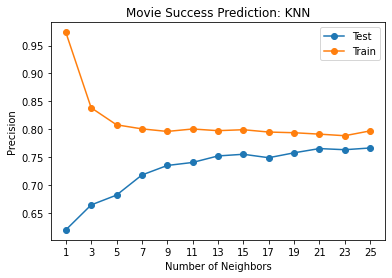

------------------------------------------------

 -----------------------------------------
Decision Tree Regression Precision
Best Score = 0.7644
Best Hyper-parameters = {'max_depth': 6}

Test Scores:
0.7342 (+/-0.066) for {'max_depth': 1}
0.7342 (+/-0.066) for {'max_depth': 2}
0.7546 (+/-0.046) for {'max_depth': 3}
0.7395 (+/-0.031) for {'max_depth': 4}
0.7389 (+/-0.014) for {'max_depth': 5}
0.7644 (+/-0.021) for {'max_depth': 6}
0.7466 (+/-0.030) for {'max_depth': 7}
0.7447 (+/-0.032) for {'max_depth': 8}
0.7269 (+/-0.009) for {'max_depth': 9}
0.6943 (+/-0.028) for {'max_depth': 10}
0.6812 (+/-0.023) for {'max_depth': 11}
0.6751 (+/-0.027) for {'max_depth': 12}
0.6506 (+/-0.017) for {'max_depth': 13}
0.6454 (+/-0.019) for {'max_depth': 14}
0.6431 (+/-0.022) for {'max_depth': 15}
0.6334 (+/-0.010) for {'max_depth': 16}

Training Scores:
0.7571 (+/-0.050) for {'max_depth': 1}
0.7571 (+/-0.050) for {'max_depth': 2}
0.7747 (+/-0.030) for {'max_depth': 3}
0.7709 (+/-0.028) for {'max_dep

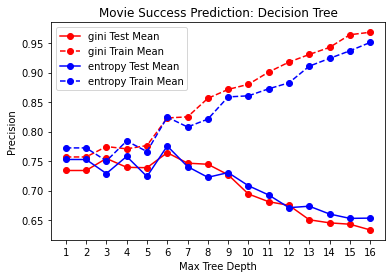

------------------------------------------------
------------------------------------------------


In [6]:
mod.precision_models(X_train, y_train)


 -----------------------------------------
Logistic Regression Precision
Best Score = 0.8093
Best Hyper-parameters = {'C': 10, 'solver': 'newton-cg'}

Test Scores:
0.7684 (+/-0.037) for {'C': 1, 'solver': 'newton-cg'}
0.7684 (+/-0.037) for {'C': 1, 'solver': 'lbfgs'}
0.7684 (+/-0.037) for {'C': 1, 'solver': 'sag'}
0.7684 (+/-0.037) for {'C': 1, 'solver': 'saga'}
0.8093 (+/-0.009) for {'C': 10, 'solver': 'newton-cg'}
0.8093 (+/-0.009) for {'C': 10, 'solver': 'lbfgs'}
0.8070 (+/-0.006) for {'C': 10, 'solver': 'sag'}
0.8093 (+/-0.009) for {'C': 10, 'solver': 'saga'}
0.8052 (+/-0.024) for {'C': 100, 'solver': 'newton-cg'}
0.8052 (+/-0.024) for {'C': 100, 'solver': 'lbfgs'}
0.8052 (+/-0.024) for {'C': 100, 'solver': 'sag'}
0.8047 (+/-0.024) for {'C': 100, 'solver': 'saga'}
0.8013 (+/-0.027) for {'C': 1000, 'solver': 'newton-cg'}
0.8013 (+/-0.027) for {'C': 1000, 'solver': 'lbfgs'}
0.8013 (+/-0.027) for {'C': 1000, 'solver': 'sag'}
0.8013 (+/-0.027) for {'C': 1000, 'solver': 'saga'}

Traini

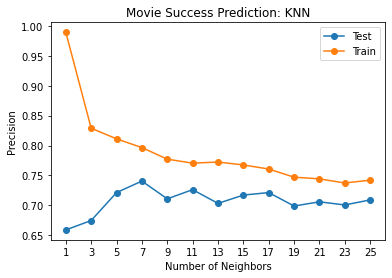

------------------------------------------------

 -----------------------------------------
Decision Tree Regression Precision
Best Score = 0.7170
Best Hyper-parameters = {'max_depth': 3}

Test Scores:
0.6459 (+/-0.038) for {'max_depth': 1}
0.6865 (+/-0.053) for {'max_depth': 2}
0.7170 (+/-0.039) for {'max_depth': 3}
0.7080 (+/-0.030) for {'max_depth': 4}
0.7074 (+/-0.040) for {'max_depth': 5}
0.6955 (+/-0.027) for {'max_depth': 6}
0.6893 (+/-0.037) for {'max_depth': 7}
0.6662 (+/-0.044) for {'max_depth': 8}
0.6568 (+/-0.025) for {'max_depth': 9}
0.6598 (+/-0.024) for {'max_depth': 10}
0.6395 (+/-0.015) for {'max_depth': 11}
0.6361 (+/-0.007) for {'max_depth': 12}
0.6292 (+/-0.013) for {'max_depth': 13}
0.6252 (+/-0.010) for {'max_depth': 14}
0.6198 (+/-0.017) for {'max_depth': 15}
0.6168 (+/-0.015) for {'max_depth': 16}

Training Scores:
0.6587 (+/-0.021) for {'max_depth': 1}
0.7073 (+/-0.079) for {'max_depth': 2}
0.7586 (+/-0.054) for {'max_depth': 3}
0.7532 (+/-0.042) for {'max_dep

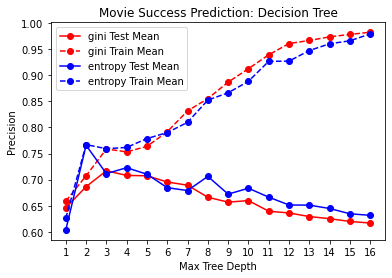

------------------------------------------------
------------------------------------------------


In [5]:
# Equally stellar results on validate. Unhash to expand.
mod.precision_models(X_validate, y_validate)

------------------
Number of records:  1379
------------------
Confusion Matrix:
[['tn: 758' 'fp: 79']
 ['fn: 272' 'tp: 270']]
------------------
Accuracy: 74.546773024 %
------------------
TPR: 49.8155 %
TNR: 90.5615 %
FPR: 9.4385 %
FNR: 50.1845 %
------------------
Precision: 0.7736
Recall: 0.4982
------------------
F1-Measure: 0.6061


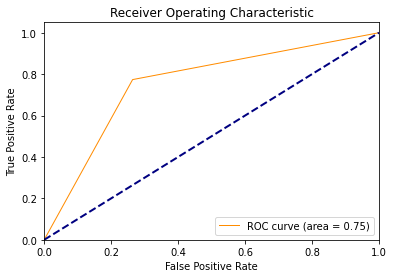

In [7]:
mod.predict_on_test(X_train, y_train, X_test, y_test)

***
***
***
***
***
***
***
#### Older Models
##### Sets from before we decided on precision
These were run on the full set of features initially, and then selected features afterward. 


 -----------------------------------------
Logistic Regression Accuracy
Best Score = 0.7784
Best Hyper-parameters = {'C': 100, 'solver': 'newton-cg'}

Test Scores:
0.6110 (+/-0.000) for {'C': 0.001, 'solver': 'newton-cg'}
0.6110 (+/-0.000) for {'C': 0.001, 'solver': 'lbfgs'}
0.6110 (+/-0.000) for {'C': 0.001, 'solver': 'sag'}
0.6110 (+/-0.000) for {'C': 0.001, 'solver': 'saga'}
0.6305 (+/-0.010) for {'C': 0.01, 'solver': 'newton-cg'}
0.6305 (+/-0.010) for {'C': 0.01, 'solver': 'lbfgs'}
0.6305 (+/-0.010) for {'C': 0.01, 'solver': 'sag'}
0.6305 (+/-0.010) for {'C': 0.01, 'solver': 'saga'}
0.6712 (+/-0.002) for {'C': 0.1, 'solver': 'newton-cg'}
0.6712 (+/-0.002) for {'C': 0.1, 'solver': 'lbfgs'}
0.6712 (+/-0.002) for {'C': 0.1, 'solver': 'sag'}
0.6712 (+/-0.002) for {'C': 0.1, 'solver': 'saga'}
0.7567 (+/-0.010) for {'C': 1, 'solver': 'newton-cg'}
0.7567 (+/-0.010) for {'C': 1, 'solver': 'lbfgs'}
0.7567 (+/-0.010) for {'C': 1, 'solver': 'sag'}
0.7569 (+/-0.010) for {'C': 1, 'solver': 'sa

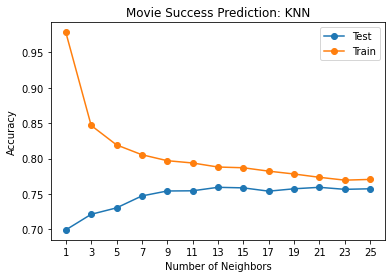

------------------------------------------------

 -----------------------------------------
Decision Tree Regression Accuracy
Best Score = 0.7631
Best Hyper-parameters = {'max_depth': 6}

Test Scores:
0.7162 (+/-0.013) for {'max_depth': 1}
0.7162 (+/-0.013) for {'max_depth': 2}
0.7494 (+/-0.014) for {'max_depth': 3}
0.7528 (+/-0.015) for {'max_depth': 4}
0.7598 (+/-0.008) for {'max_depth': 5}
0.7631 (+/-0.016) for {'max_depth': 6}
0.7613 (+/-0.017) for {'max_depth': 7}
0.7543 (+/-0.015) for {'max_depth': 8}
0.7510 (+/-0.015) for {'max_depth': 9}
0.7359 (+/-0.016) for {'max_depth': 10}
0.7248 (+/-0.017) for {'max_depth': 11}
0.7271 (+/-0.019) for {'max_depth': 12}
0.7142 (+/-0.019) for {'max_depth': 13}
0.7147 (+/-0.015) for {'max_depth': 14}
0.7160 (+/-0.016) for {'max_depth': 15}
0.7059 (+/-0.014) for {'max_depth': 16}

Training Scores:
0.7298 (+/-0.004) for {'max_depth': 1}
0.7298 (+/-0.004) for {'max_depth': 2}
0.7584 (+/-0.006) for {'max_depth': 3}
0.7706 (+/-0.005) for {'max_dept

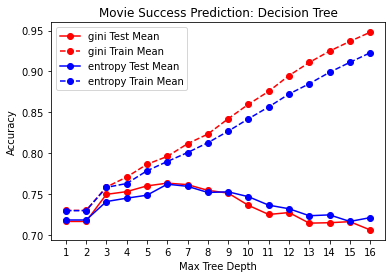

------------------------------------------------

 -----------------------------------------
Random Forest Accuracy
Best Score = 0.7701
Best Hyper-parameters = {'n_estimators': 9}

Test Scores:
0.7349 (+/-0.016) for {'n_estimators': 1}
0.7512 (+/-0.014) for {'n_estimators': 2}
0.7533 (+/-0.020) for {'n_estimators': 3}
0.7538 (+/-0.024) for {'n_estimators': 4}
0.7616 (+/-0.016) for {'n_estimators': 5}
0.7603 (+/-0.009) for {'n_estimators': 6}
0.7665 (+/-0.009) for {'n_estimators': 7}
0.7691 (+/-0.017) for {'n_estimators': 8}
0.7701 (+/-0.014) for {'n_estimators': 9}
0.7650 (+/-0.011) for {'n_estimators': 10}

Training Scores:
0.7764 (+/-0.006) for {'n_estimators': 1}
0.7904 (+/-0.003) for {'n_estimators': 2}
0.7997 (+/-0.006) for {'n_estimators': 3}
0.7985 (+/-0.008) for {'n_estimators': 4}
0.8062 (+/-0.007) for {'n_estimators': 5}
0.8079 (+/-0.008) for {'n_estimators': 6}
0.8080 (+/-0.007) for {'n_estimators': 7}
0.8143 (+/-0.005) for {'n_estimators': 8}
0.8171 (+/-0.004) for {'n_estim

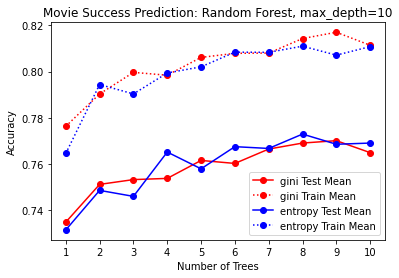

------------------------------------------------
------------------------------------------------


In [8]:
mod.accuracy_models(X_train, y_train)


 -----------------------------------------
Logistic Regression Accuracy
Best Score = 0.7589
Best Hyper-parameters = {'C': 1000, 'solver': 'newton-cg'}

Test Scores:
0.6169 (+/-0.001) for {'C': 0.001, 'solver': 'newton-cg'}
0.6169 (+/-0.001) for {'C': 0.001, 'solver': 'lbfgs'}
0.6169 (+/-0.001) for {'C': 0.001, 'solver': 'sag'}
0.6169 (+/-0.001) for {'C': 0.001, 'solver': 'saga'}
0.6169 (+/-0.001) for {'C': 0.01, 'solver': 'newton-cg'}
0.6169 (+/-0.001) for {'C': 0.01, 'solver': 'lbfgs'}
0.6169 (+/-0.001) for {'C': 0.01, 'solver': 'sag'}
0.6169 (+/-0.001) for {'C': 0.01, 'solver': 'saga'}
0.6634 (+/-0.008) for {'C': 0.1, 'solver': 'newton-cg'}
0.6634 (+/-0.008) for {'C': 0.1, 'solver': 'lbfgs'}
0.6634 (+/-0.008) for {'C': 0.1, 'solver': 'sag'}
0.6634 (+/-0.008) for {'C': 0.1, 'solver': 'saga'}
0.7045 (+/-0.005) for {'C': 1, 'solver': 'newton-cg'}
0.7045 (+/-0.005) for {'C': 1, 'solver': 'lbfgs'}
0.7045 (+/-0.005) for {'C': 1, 'solver': 'sag'}
0.7045 (+/-0.005) for {'C': 1, 'solver': 's

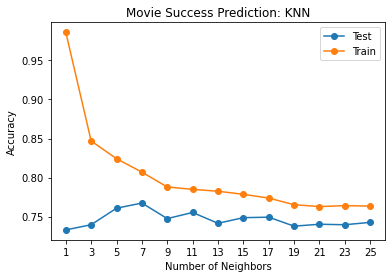

------------------------------------------------

 -----------------------------------------
Decision Tree Regression Accuracy
Best Score = 0.7601
Best Hyper-parameters = {'max_depth': 6}

Test Scores:
0.7251 (+/-0.025) for {'max_depth': 1}
0.7287 (+/-0.020) for {'max_depth': 2}
0.7456 (+/-0.030) for {'max_depth': 3}
0.7474 (+/-0.019) for {'max_depth': 4}
0.7583 (+/-0.022) for {'max_depth': 5}
0.7601 (+/-0.017) for {'max_depth': 6}
0.7486 (+/-0.023) for {'max_depth': 7}
0.7366 (+/-0.024) for {'max_depth': 8}
0.7293 (+/-0.013) for {'max_depth': 9}
0.7317 (+/-0.009) for {'max_depth': 10}
0.7221 (+/-0.010) for {'max_depth': 11}
0.7160 (+/-0.005) for {'max_depth': 12}
0.7082 (+/-0.011) for {'max_depth': 13}
0.7106 (+/-0.016) for {'max_depth': 14}
0.7069 (+/-0.009) for {'max_depth': 15}
0.7021 (+/-0.010) for {'max_depth': 16}

Training Scores:
0.7347 (+/-0.005) for {'max_depth': 1}
0.7350 (+/-0.005) for {'max_depth': 2}
0.7660 (+/-0.006) for {'max_depth': 3}
0.7740 (+/-0.003) for {'max_dept

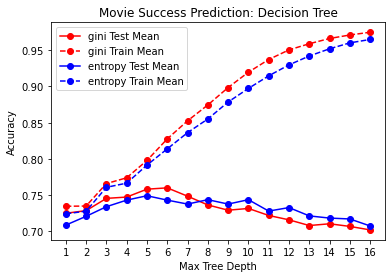

------------------------------------------------

 -----------------------------------------
Random Forest Accuracy
Best Score = 0.7728
Best Hyper-parameters = {'n_estimators': 9}

Test Scores:
0.7408 (+/-0.029) for {'n_estimators': 1}
0.7420 (+/-0.020) for {'n_estimators': 2}
0.7613 (+/-0.033) for {'n_estimators': 3}
0.7637 (+/-0.022) for {'n_estimators': 4}
0.7583 (+/-0.023) for {'n_estimators': 5}
0.7637 (+/-0.014) for {'n_estimators': 6}
0.7547 (+/-0.016) for {'n_estimators': 7}
0.7589 (+/-0.021) for {'n_estimators': 8}
0.7728 (+/-0.013) for {'n_estimators': 9}
0.7662 (+/-0.014) for {'n_estimators': 10}

Training Scores:
0.7841 (+/-0.023) for {'n_estimators': 1}
0.8154 (+/-0.003) for {'n_estimators': 2}
0.8210 (+/-0.005) for {'n_estimators': 3}
0.8384 (+/-0.009) for {'n_estimators': 4}
0.8388 (+/-0.009) for {'n_estimators': 5}
0.8431 (+/-0.007) for {'n_estimators': 6}
0.8453 (+/-0.009) for {'n_estimators': 7}
0.8465 (+/-0.007) for {'n_estimators': 8}
0.8440 (+/-0.004) for {'n_estim

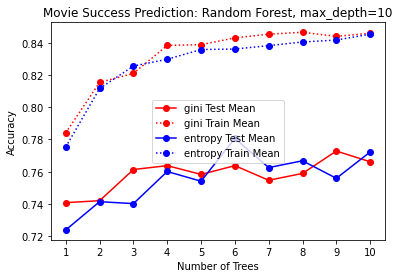

------------------------------------------------
------------------------------------------------


In [9]:
mod.accuracy_models(X_validate, y_validate)


 -----------------------------------------
Logistic Regression Recall
Best Score = 0.5630
Best Hyper-parameters = {'C': 10000, 'solver': 'newton-cg'}

Test Scores:
0.0000 (+/-0.000) for {'C': 0.001, 'solver': 'newton-cg'}
0.0000 (+/-0.000) for {'C': 0.001, 'solver': 'lbfgs'}
0.0000 (+/-0.000) for {'C': 0.001, 'solver': 'sag'}
0.0000 (+/-0.000) for {'C': 0.001, 'solver': 'saga'}
0.0686 (+/-0.022) for {'C': 0.01, 'solver': 'newton-cg'}
0.0686 (+/-0.022) for {'C': 0.01, 'solver': 'lbfgs'}
0.0686 (+/-0.022) for {'C': 0.01, 'solver': 'sag'}
0.0686 (+/-0.022) for {'C': 0.01, 'solver': 'saga'}
0.4311 (+/-0.013) for {'C': 0.1, 'solver': 'newton-cg'}
0.4311 (+/-0.013) for {'C': 0.1, 'solver': 'lbfgs'}
0.4311 (+/-0.013) for {'C': 0.1, 'solver': 'sag'}
0.4311 (+/-0.013) for {'C': 0.1, 'solver': 'saga'}
0.4930 (+/-0.013) for {'C': 1, 'solver': 'newton-cg'}
0.4930 (+/-0.013) for {'C': 1, 'solver': 'lbfgs'}
0.4930 (+/-0.013) for {'C': 1, 'solver': 'sag'}
0.4937 (+/-0.014) for {'C': 1, 'solver': 'sa

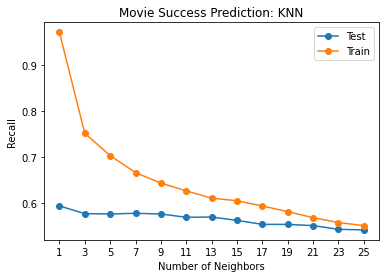


 -----------------------------------------
Decision Tree Regression Recall
Best Score = 0.5929
Best Hyper-parameters = {'max_depth': 5}

Test Scores:
0.4430 (+/-0.072) for {'max_depth': 1}
0.4430 (+/-0.072) for {'max_depth': 2}
0.5336 (+/-0.030) for {'max_depth': 3}
0.5663 (+/-0.052) for {'max_depth': 4}
0.5929 (+/-0.040) for {'max_depth': 5}
0.5649 (+/-0.042) for {'max_depth': 6}
0.5856 (+/-0.018) for {'max_depth': 7}
0.5643 (+/-0.023) for {'max_depth': 8}
0.5636 (+/-0.049) for {'max_depth': 9}
0.5683 (+/-0.040) for {'max_depth': 10}
0.5676 (+/-0.041) for {'max_depth': 11}
0.5796 (+/-0.042) for {'max_depth': 12}
0.5876 (+/-0.046) for {'max_depth': 13}
0.5836 (+/-0.035) for {'max_depth': 14}
0.5823 (+/-0.044) for {'max_depth': 15}
0.5856 (+/-0.049) for {'max_depth': 16}

Training Scores:
0.4629 (+/-0.070) for {'max_depth': 1}
0.4629 (+/-0.070) for {'max_depth': 2}
0.5381 (+/-0.045) for {'max_depth': 3}
0.5884 (+/-0.051) for {'max_depth': 4}
0.6344 (+/-0.019) for {'max_depth': 5}
0.607

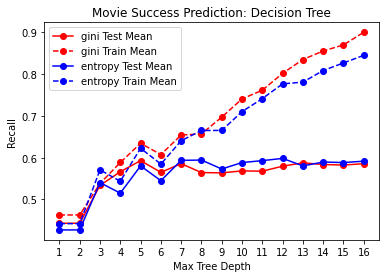


 -----------------------------------------
Random Forest Recall
Best Score = 0.5963
Best Hyper-parameters = {'n_estimators': 2}

Test Scores:
0.5756 (+/-0.058) for {'n_estimators': 1}
0.5963 (+/-0.021) for {'n_estimators': 2}
0.5830 (+/-0.028) for {'n_estimators': 3}
0.5743 (+/-0.025) for {'n_estimators': 4}
0.5676 (+/-0.046) for {'n_estimators': 5}
0.5956 (+/-0.030) for {'n_estimators': 6}
0.5676 (+/-0.030) for {'n_estimators': 7}
0.5876 (+/-0.030) for {'n_estimators': 8}
0.5809 (+/-0.012) for {'n_estimators': 9}
0.5843 (+/-0.026) for {'n_estimators': 10}

Training Scores:
0.6244 (+/-0.047) for {'n_estimators': 1}
0.6477 (+/-0.038) for {'n_estimators': 2}
0.6336 (+/-0.024) for {'n_estimators': 3}
0.6272 (+/-0.033) for {'n_estimators': 4}
0.6173 (+/-0.021) for {'n_estimators': 5}
0.6537 (+/-0.029) for {'n_estimators': 6}
0.6307 (+/-0.017) for {'n_estimators': 7}
0.6392 (+/-0.013) for {'n_estimators': 8}
0.6364 (+/-0.025) for {'n_estimators': 9}
0.6404 (+/-0.018) for {'n_estimators': 1

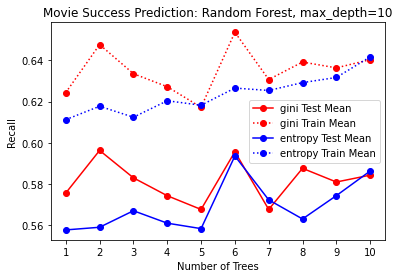

In [10]:
mod.recall_models(X_train, y_train)


 -----------------------------------------
Logistic Regression Recall
Best Score = 0.4952
Best Hyper-parameters = {'C': 1000, 'solver': 'newton-cg'}

Test Scores:
0.0000 (+/-0.000) for {'C': 0.001, 'solver': 'newton-cg'}
0.0000 (+/-0.000) for {'C': 0.001, 'solver': 'lbfgs'}
0.0000 (+/-0.000) for {'C': 0.001, 'solver': 'sag'}
0.0000 (+/-0.000) for {'C': 0.001, 'solver': 'saga'}
0.0000 (+/-0.000) for {'C': 0.01, 'solver': 'newton-cg'}
0.0000 (+/-0.000) for {'C': 0.01, 'solver': 'lbfgs'}
0.0000 (+/-0.000) for {'C': 0.01, 'solver': 'sag'}
0.0000 (+/-0.000) for {'C': 0.01, 'solver': 'saga'}
0.2461 (+/-0.027) for {'C': 0.1, 'solver': 'newton-cg'}
0.2461 (+/-0.027) for {'C': 0.1, 'solver': 'lbfgs'}
0.2461 (+/-0.027) for {'C': 0.1, 'solver': 'sag'}
0.2461 (+/-0.027) for {'C': 0.1, 'solver': 'saga'}
0.3297 (+/-0.010) for {'C': 1, 'solver': 'newton-cg'}
0.3297 (+/-0.010) for {'C': 1, 'solver': 'lbfgs'}
0.3297 (+/-0.010) for {'C': 1, 'solver': 'sag'}
0.3297 (+/-0.010) for {'C': 1, 'solver': 'sag

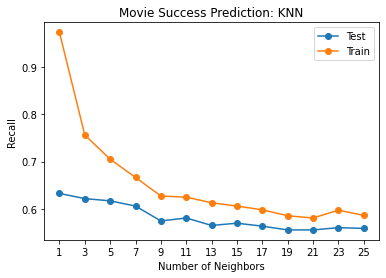


 -----------------------------------------
Decision Tree Regression Recall
Best Score = 0.6703
Best Hyper-parameters = {'max_depth': 6}

Test Scores:
0.6324 (+/-0.030) for {'max_depth': 1}
0.5663 (+/-0.129) for {'max_depth': 2}
0.5632 (+/-0.128) for {'max_depth': 3}
0.5853 (+/-0.090) for {'max_depth': 4}
0.6356 (+/-0.018) for {'max_depth': 5}
0.6703 (+/-0.031) for {'max_depth': 6}
0.6419 (+/-0.027) for {'max_depth': 7}
0.6340 (+/-0.027) for {'max_depth': 8}
0.6325 (+/-0.023) for {'max_depth': 9}
0.6325 (+/-0.022) for {'max_depth': 10}
0.6199 (+/-0.033) for {'max_depth': 11}
0.6105 (+/-0.034) for {'max_depth': 12}
0.6089 (+/-0.039) for {'max_depth': 13}
0.5995 (+/-0.044) for {'max_depth': 14}
0.6152 (+/-0.039) for {'max_depth': 15}
0.6152 (+/-0.038) for {'max_depth': 16}

Training Scores:
0.6455 (+/-0.054) for {'max_depth': 1}
0.5658 (+/-0.108) for {'max_depth': 2}
0.5871 (+/-0.084) for {'max_depth': 3}
0.6210 (+/-0.068) for {'max_depth': 4}
0.6857 (+/-0.042) for {'max_depth': 5}
0.747

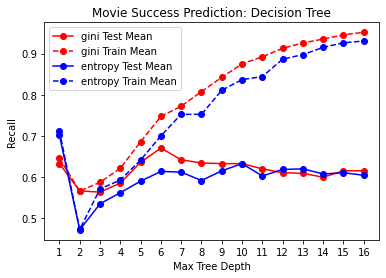


 -----------------------------------------
Random Forest Recall
Best Score = 0.6640
Best Hyper-parameters = {'n_estimators': 5}

Test Scores:
0.6199 (+/-0.023) for {'n_estimators': 1}
0.5788 (+/-0.039) for {'n_estimators': 2}
0.6278 (+/-0.044) for {'n_estimators': 3}
0.6120 (+/-0.024) for {'n_estimators': 4}
0.6640 (+/-0.056) for {'n_estimators': 5}
0.6420 (+/-0.057) for {'n_estimators': 6}
0.6325 (+/-0.057) for {'n_estimators': 7}
0.6562 (+/-0.048) for {'n_estimators': 8}
0.6420 (+/-0.037) for {'n_estimators': 9}
0.6216 (+/-0.049) for {'n_estimators': 10}

Training Scores:
0.6991 (+/-0.055) for {'n_estimators': 1}
0.6830 (+/-0.024) for {'n_estimators': 2}
0.7275 (+/-0.010) for {'n_estimators': 3}
0.7106 (+/-0.033) for {'n_estimators': 4}
0.7335 (+/-0.016) for {'n_estimators': 5}
0.7244 (+/-0.013) for {'n_estimators': 6}
0.7433 (+/-0.019) for {'n_estimators': 7}
0.7409 (+/-0.011) for {'n_estimators': 8}
0.7232 (+/-0.020) for {'n_estimators': 9}
0.7338 (+/-0.025) for {'n_estimators': 1

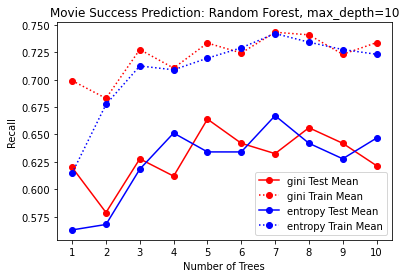

In [11]:
mod.recall_models(X_validate, y_validate)

***
***
RIP
***
***
***
### Code Graveyard.
Initial approaches, for the sake of recalling the steps I took. 


In [ ]:
# Initial catch-all set, before deciding on precision
#forest = RandomForestClassifier(n_estimators=8,
#                               criterion='entropy')
#sfs = SequentialFeatureSelector(forest, n_features_to_select=8)
#sfs1 = sfs.fit(X_train, y_train)

#sfs1.get_support()

# which gives the following best features.
#sfs_features = ['budget', 'vote_average', 'vote_count', 'release_year',
#                'is_genre_comedy', 'cast_actor_1_Robin Williams',
#                'production_company_TwentiethCenturyFoxFilmCorporation',
#                'production_company_other_company']    

#logReg = LogisticRegression(C= 10, solver = 'lbfgs', max_iter=1000)
#sfs2 = SequentialFeatureSelector(logReg, n_features_to_select=10)
#sfs3 = sfs2.fit(X_train, y_train)
#
#len([ True, False, False,  True, False, False, False, False,  True,
#       False,  True, False, False, False, False, False, False, False,
#       False, False, False, False, False, False, False, False, False,
#        True,  True, False, False,  True, False, False, False, False,
#        True,  True, False, False, False, False, False, False,  True])
#
#sfs3.get_support()
#
#X_train.iloc[:, 44]
#
#precision_features = ['budget', 'vote_count', 'is_genre_scifi', 'is_genre_thriller',
#                      'cast_actor_1_Nicolas Cage', 'cast_actor_1_Robert De Niro',
#                      'cast_actor_1_Tom Cruise', 'production_company_Metro-Goldwyn-Mayer(MGM)',
#                      'production_company_NewLineCinema', 'production_company_other_company'] 
#
#len(precision_features)
#
##X_train = X_train.loc[:,sfs_features]
##X_validate = X_validate.loc[:,sfs_features]
##X_test = X_test.loc[:,sfs_features]
#X_train_p1 = X_train.loc[:,precision_features]
#X_validate_p1 = X_validate.loc[:,precision_features]
#X_test_p1 = X_test.loc[:,precision_features]
##############################################################################################################################
# initial set 
#mod.precision_models(X_train_p1, y_train)
#mod.precision_models(X_validate_p1, y_validate)

#precision_features = ['budget', 'vote_count', 'is_genre_scifi', 'is_genre_thriller',
#                      'cast_actor_1_Nicolas Cage', 'cast_actor_1_Robert De Niro',
#                      'cast_actor_1_Tom Cruise', 'production_company_Metro-Goldwyn-Mayer(MGM)',
#                      'production_company_NewLineCinema', 'production_company_other_company'] 
#
#sfs_features = ['budget', 'vote_average', 'vote_count', 'release_year',
#                'is_genre_comedy', 'cast_actor_1_Robin Williams',
#                'production_company_TwentiethCenturyFoxFilmCorporation',
#                'production_company_other_company']  
## add lists together without duplicating values
#precision_2 = list(set(precision_features + sfs_features))
#
#print(precision_2, '\n')
#print(f'Number of features: {len(precision_2)}')
#
#X_train_p2 = X_train.loc[:,precision_2]
#X_validate_p2 = X_validate.loc[:,precision_2]
#X_test_p2 = X_test.loc[:,precision_2

#mod.precision_models(X_train_p2, y_train)

#logReg = LogisticRegression(C= 10, solver = 'newton_cg', max_iter=1000)
#sfs4 = SequentialFeatureSelector(logReg, direction= 'backward', n_features_to_select=10)
#sfs5 = sfs2.fit(X_train_p2, y_train)

# sfs5.get_support()

#lr = LogisticRegression(max_iter=10000,
#                        C = 100,
#                        solver ='newton-cg',
#                        multi_class='auto')
#
## prediction_accuracies.
#prediction_accuracies = []
#confusion_matrices = []
#
## predictions.
#model_predictions = [] 
#target_predictions = []
#
## Train the model using training sets.
#lr.fit(X_train, y_train)
#y_pred = lr.predict(X_test)
#accuracy = metrics.accuracy_score(y_test, y_pred)
#prediction_accuracies.append(accuracy)
## Metrics.
#confusion_matrices.append(metrics.confusion_matrix(y_test, y_pred))
#
## Predictions and Targets.
#target_predictions.append(y_test)
#model_predictions.append(y_pred)
#
#totals = np.array([[0, 0],[0, 0]])
#
#for matrix in confusion_matrices:
#
#    for i in range(0, 2):
#        for j in range(0, 2):
#            totals[i][j] += matrix[i][j]
#
#tn, fp, fn, tp = totals.ravel()
#
#cm = np.array([['tn: '+str(tn), 'fp: '+str(fp)],['fn: '+str(fn), 'tp: '+str(tp)]])
#
#print("------------------")
#total_records = tn+fp+fn+tp
#print("Number of records: ", total_records)
#print("------------------")
#print("Confusion Matrix:")
#print(cm)
#print("------------------")
#avg = sum(prediction_accuracies)/len(prediction_accuracies)
#print("Accuracy: %.9f %%" %(avg*100))
#print("------------------")
#tpr = (tp/(tp+fn))*100
#tnr = (tn/(tn+fp))*100
#fpr = (fp/(tn+fp))*100
#fnr = (fn/(tp+fn))*100
#print("TPR: %.4f %%" %(tpr))
#print("TNR: %.4f %%" %(tnr))
#print("FPR: %.4f %%" %(fpr))
#print("FNR: %.4f %%" %(fnr))
#print("------------------")
#precision = (tp/(tp+fp))
#recall = (tp/(tp+fn))
#print("Precision: %.4f" %(precision))
#print("Recall: %.4f" %(recall))
#print("------------------")
#f1measure = 2*((precision*recall)/(precision+recall))
#print("F1-Measure: %.4f" %(f1measure))
#
#
## Predictions
#target_predictions = np.concatenate((target_predictions), axis=None)
#model_predictions = np.concatenate((model_predictions), axis=None)
#
#
#fpr, tpr, thresholds = roc_curve(model_predictions, target_predictions)
#roc_auc = auc(fpr, tpr)
#
#plt.figure()
#lw=2
#plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic')
#plt.legend(loc="lower right")
#plt.savefig('Logistic Regression ROC Curve.png')
#plt.show()